## Polynomial regression

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [4]:
x=6*np.random.randn(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

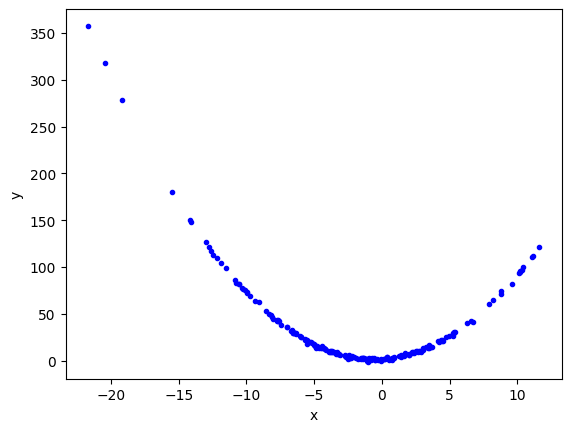

In [7]:
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [11]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(x_test)


In [15]:
r2_score(y_test,y_pred)

0.21749682371365264

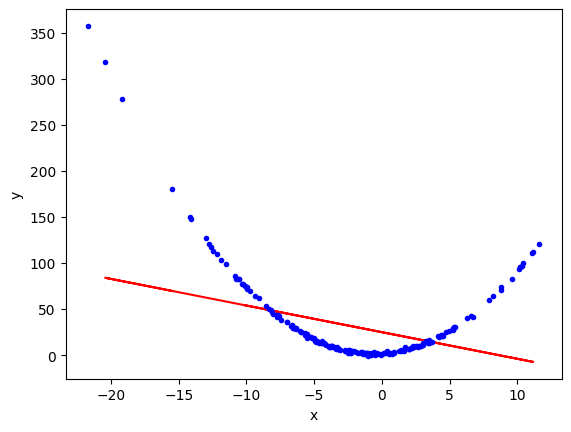

In [17]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## applying polynomial regression

In [19]:
poly=PolynomialFeatures(degree=2)

In [21]:
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [23]:
print(x_train[0])
print(x_train_trans[0])

[-10.13403033]
[  1.         -10.13403033 102.69857082]


In [25]:
li=LinearRegression()
li.fit(x_train_trans,y_train)


LinearRegression()

In [27]:
y_pred1=li.predict(x_test_trans)


In [29]:
r2_score(y_test,y_pred1)

0.9997632546898458

In [31]:
print (li.coef_)

[[0.         0.91097247 0.80215564]]


In [33]:
print(li.intercept_)

[1.84954876]


In [35]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = li.predict(X_new_poly)

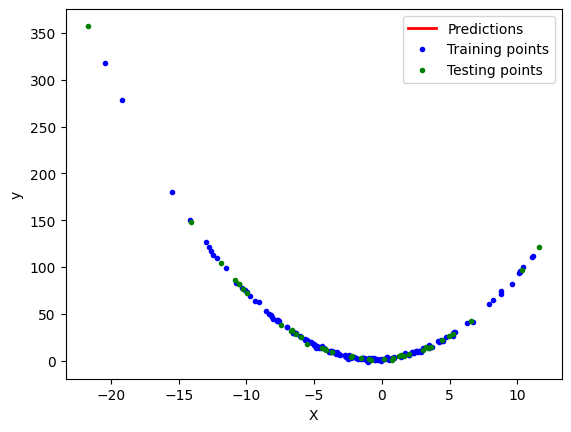

In [39]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [41]:
def polynomial_regression(degree):
    x_new=np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

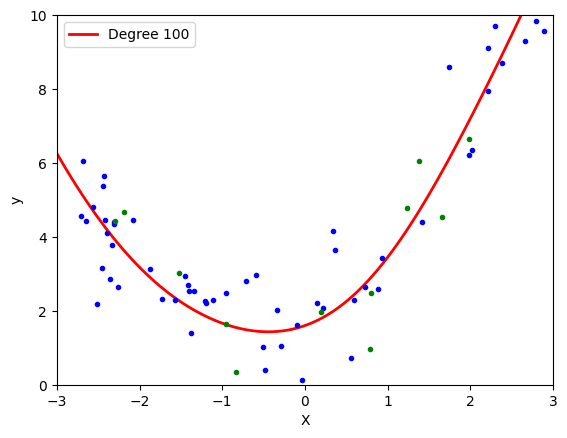

In [49]:
polynomial_regression(100)

In [51]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

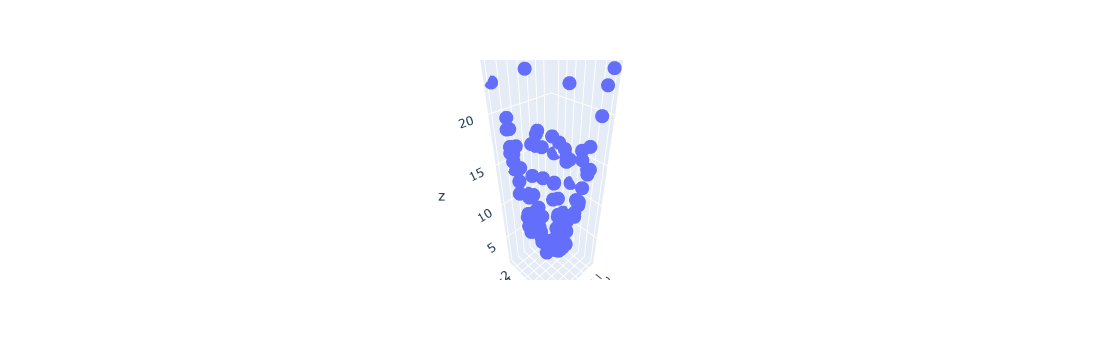

In [53]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [69]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

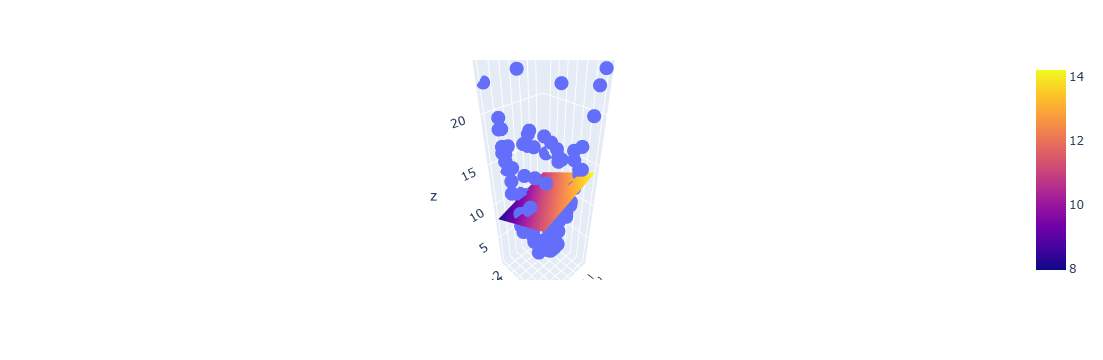

In [71]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [73]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [75]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [77]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'